# Business Case Study

##### This dataset contain reviews of Instagram app by using Threads, We have to find out the Sentiment analysis and reviews by users on Google play.

# Import Dependencies

In [1]:
import os
import sys
import warnings
import pandas
import nltk
import numpy

import pandas as pd
import numpy as np


import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv("threads_reviews.csv")
df.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43

In [3]:
df.tail()

source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43

In [4]:
df.shape

(32910, 4)

In [5]:
df.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [6]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(keep = "first",inplace = True)
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32909 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32909 non-null  object
 1   review_description  32909 non-null  object
 2   rating              32909 non-null  int64 
 3   review_date         32909 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


## EDA(Exploratory Data Analysis)
### Data Visualization

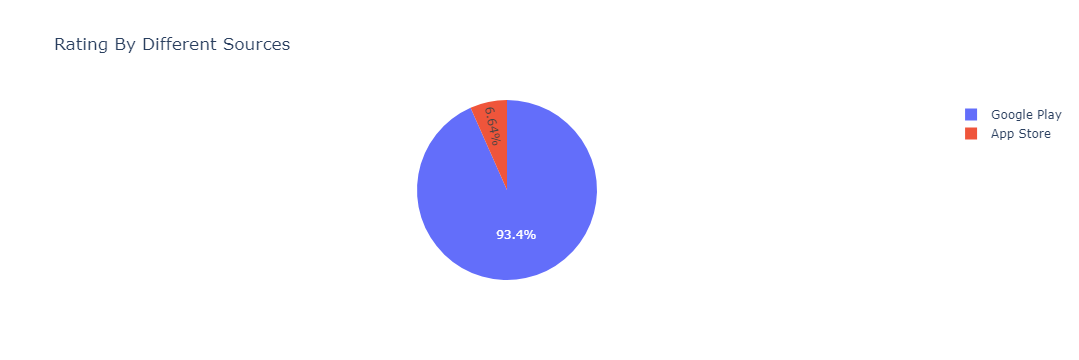

In [10]:
fig = px.pie(df,values = "rating",names = "source", title = "Rating By Different Sources")
fig.show()

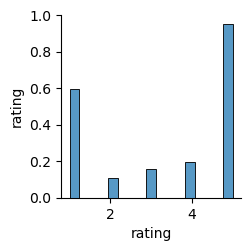

In [11]:
sns.pairplot(df)

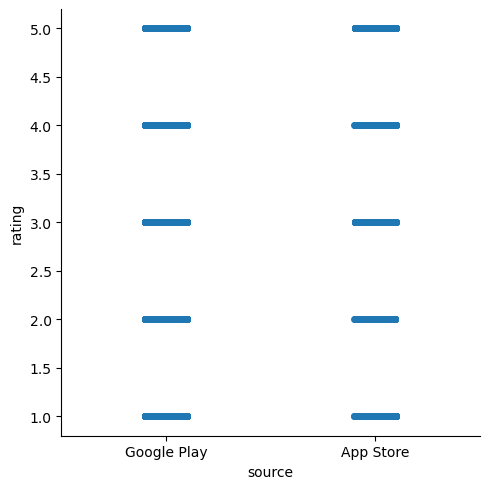

In [12]:
sns.catplot(data = df, x = "source",y = "rating")

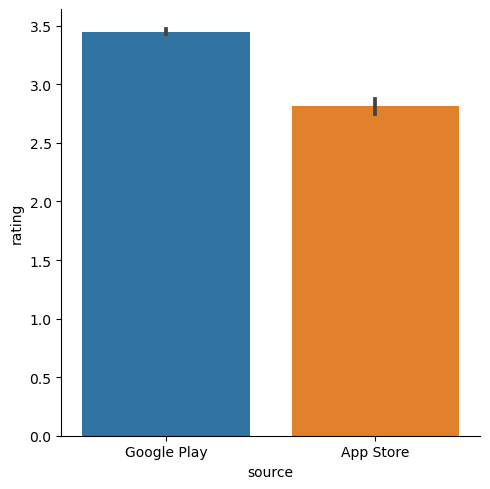

In [13]:
sns.catplot(data = df, x = "source",y = "rating",kind = "bar")

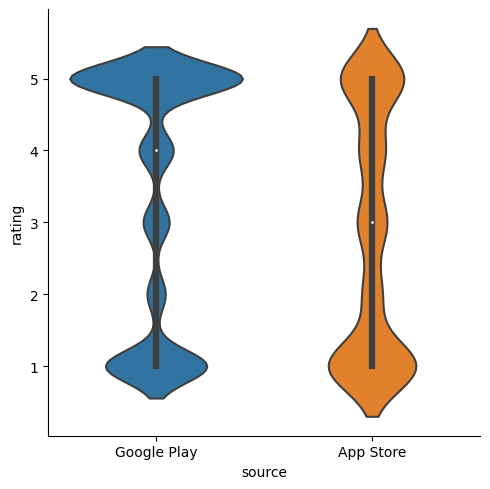

In [14]:
sns.catplot(data = df, x = "source",y = "rating",kind = "violin")

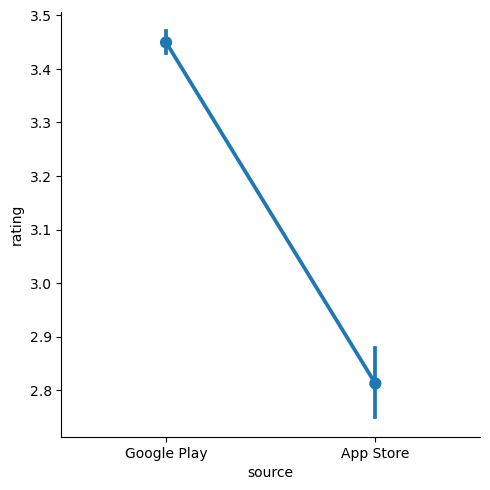

In [15]:
sns.catplot(data = df, x = "source",y = "rating",kind = "point")

<Axes: >

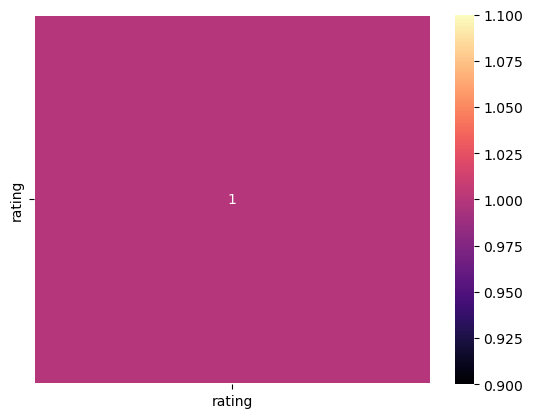

In [16]:
sns.heatmap(df.corr(),annot = True, cmap = "magma",linewidths=0.01)

## Data Pre-processing and Data Cleaning

In [17]:
df.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date  
0  2023-07-08 14:18:24  
1  2023-07-19 20:52:48  
2  2023-07-06 23:03:11  
3  2023-07-10 00:53:25  
4  2023-07-06 16:57:43

In [18]:
df.drop("review_date",axis = 1,inplace = True)

In [19]:
df.head(3)

source                                 review_description  rating
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2
1  Google Play  Pretty good for a first launch!! Its easy to u...       3
2  Google Play  For a brand new app, it's very well optimized....       3

In [20]:
df["source"].unique()

array(['Google Play', 'App Store'], dtype=object)

#### Converting Object Data Type to Numeric Data Type

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df["source"] = le.fit_transform(df["source"])

In [23]:
df.head(4)

source                                 review_description  rating
0       1  Meh. Not the greatest experience on a Chromebo...       2
1       1  Pretty good for a first launch!! Its easy to u...       3
2       1  For a brand new app, it's very well optimized....       3
3       1  Great app with a lot of potential! However, th...       3

In [24]:
df.tail(10)

source                                 review_description  rating
32900       0                   Meta the greatest thread #mark Z       5
32901       0                                      Love it w app       5
32902       0                           Don’t download this bruh       1
32903       0  Feels like a made in China version of Twitter…...       1
32904       0  Censoring Conservatives and silencing us to tu...       1
32905       0  This killed my dog. Mark zuckerburg strangled ...       1
32906       0              Add Search and hashtag like Twitter !       1
32907       0                                        bad twister       1
32908       0                       Yet another trash from Meta.       1
32909       0  Nothing special this app is just a copy of twi...       1

In [25]:
df.shape

(32909, 3)

In [26]:
df.isnull().sum()

source                0
review_description    0
rating                0
dtype: int64

In [27]:
df.duplicated().sum()

5681

In [28]:
df.drop_duplicates(keep = "first", inplace = True)
df.duplicated().sum()

0

### Description of all Ratings

#### 1. Rating_1

In [29]:
rating_1 = df[df["rating"]==1]
rating_1["review_description"].iloc[15]

'Its just not working. It was fine for a while but something happened and now whenever I try to check my notifications or write something, it says "sorry something went wrong". Tried reinstalling, didn\'t help, it\'s simply just broken. I was already disappointed in this half-baked trash that lacks even the most basic functions like hashtags, but at my current state, I\'m unable to do anything but refresh the timeline which is filled with unfunny meme accounts and verified scum. Unusable. Zuck lost.'

In [30]:
rating_1["review_description"].iloc[40]

'App with Limited Login Options I recently tried out an app that caught my interest due to its promising features and positive reviews. However, my experience quickly turned sour when I realized that the app did not allow login with a Google ID. This limitation significantly hindered my ability to conveniently access the app and affected my overall user experience. One of the main advantages of using Google login is the convenience it offers. With just a few taps, I can seamlessly access.'

#### 2. Rating_2

In [31]:
rating_2 = df[df["rating"]==2]
rating_2["review_description"].iloc[20]

"While I do think the app has some potential, there are several problems. Some of them include the lack of photo filters when you upload photos, the inability to delete your Threads account without your Instagram account, the inability to use more than one account, and the app crashing several times when I log out, leading myself to delete data and cache rather frequently. I wish this app wasn't released prematurely and that Instagram gives more time to develop Threads as a more stable app."

In [32]:
rating_2["review_description"].iloc[40]

"I understand it just released, but there's a lot to improve. Some things I think should be fixed/added: the option to search for tags or words; too many accounts I don't follow on my tl; chat system; stories; show the quotes for threads; allow us to select from gallery folders when selecting pics to post Edit: new issue, the app keeps closing whenever I try to post something"

#### 3. Rating_3

In [33]:
rating_3 = df[df["rating"]==3]
rating_3["review_description"].iloc[10]

"It's a good start but they have to add some thing before it can be great: 1. They need to add an option to see only people you follow instead of an annoying algorithm. 2. They need to let you mute all posts from languages you don't want or not know. 3. They also need to add option to change the name without changing the Instagram name. 4. Another useful think would be the ability to zoom on an image and staying zoomed without it snapping back to normal size. 5. They need a website."

In [34]:
rating_3["review_description"].iloc[50]

"Has a display picture uploading bug. I've tried to change my profile pic on 3 different devices but its still stuck as the plain white default one. Aside form this bug, the app is great, nice and simple. I enjoyed Twitter a lot before. I'm curious to see how the Threads vs Twitter fight goes."

#### 4. Rating_4

In [35]:
rating_4 = df[df["rating"]==4]
rating_4["review_description"].iloc[10]

"REALLY impressed!! WHAT I LIKED: so far i haven't experienced any bugs and the app feels very sorted, refined, thoroughly planned and well put together, i might increase my rating when they add some new interesting features, which im sure they will WHAT I DIDNT LIKE: The algorithm, its very random, i actually just want information from people i follow, or maybe a seperate for you page like on Instagram could work too, lacks some features but given the release time, I'll wait gor some."

In [36]:
rating_4["review_description"].iloc[30]

"Great app, but I think 2 issues have to be fixed,, First, it's gonna be better if the pictures/photos are downloadable, Second, when writing using 2 languages like Arabic & English in one thread, the order of the text gets messed up, so for a socialmedia where writing threads is the thing, I believe fixing this issue is necessary. Overall, creating this platform and this app is a great idea."

#### 5. Rating_5

In [37]:
rating_5 = df[df["rating"]==5]
rating_5["review_description"].iloc[10]

"So far, so good. It's still in the early stages, and more features are being created as it's used, but so far, the experience has been great, and the community is supportive, positive, and helpful. There seems to be a concerted effort on the new users to block disinformation, hate speech, racism, and focus on sharing facts and real news."

In [38]:
rating_5["review_description"].iloc[50]

"It a good apps for rivals Twitter but i hope this apps can have a dark mode option so sone people will not suffer for the light mode brightness. Plus please have an option like this from camera, this from Pinterest, this from Twitter and etc when we pick a photo from our gallery so the user don't have to search for the photo one by one. Hope you will improve it💜"

## WordCloud For Most Common Words In Ratings

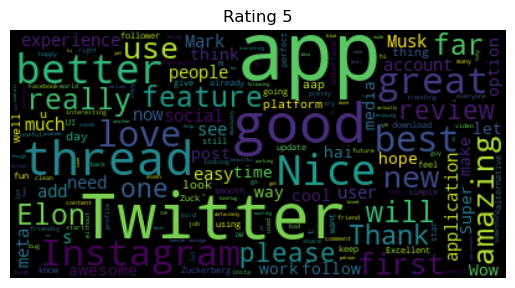

In [39]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(5)

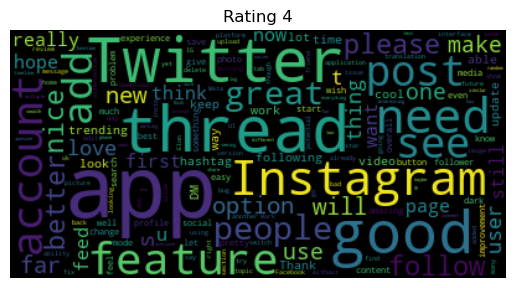

In [40]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(4)

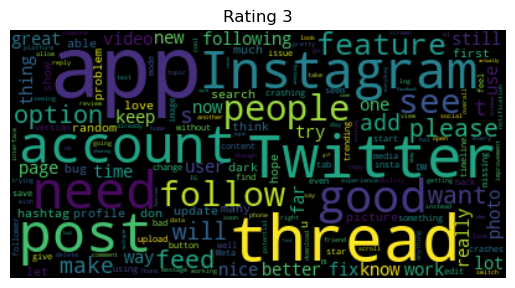

In [41]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(3)

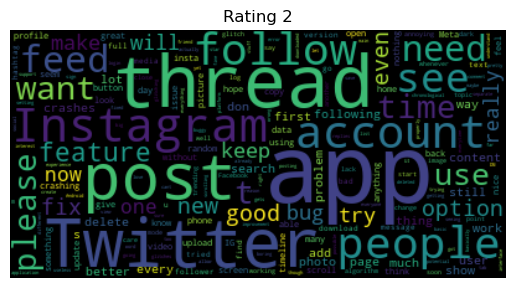

In [42]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(2)

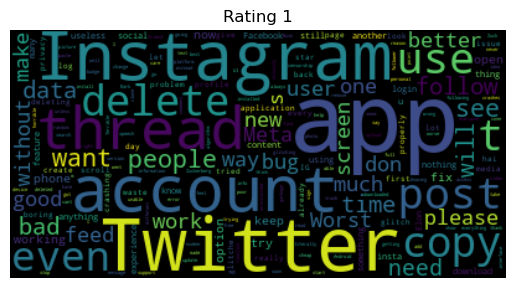

In [43]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='black').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(1)

#### Cleaning Text

In [44]:
import string
import emoji
import re
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = emoji.demojize(text)
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
df['new_review'] = df['review_description'].apply(cleaning_text)

In [45]:
df.head()

source                                 review_description  rating  \
0       1  Meh. Not the greatest experience on a Chromebo...       2   
1       1  Pretty good for a first launch!! Its easy to u...       3   
2       1  For a brand new app, it's very well optimized....       3   
3       1  Great app with a lot of potential! However, th...       3   
4       1  The app is good, but it needs a lot of functio...       3   

                                          new_review  
0  meh not the greatest experience on a chromeboo...  
1  pretty good for a first launch its easy to use...  
2  for a brand new app its very well optimized ho...  
3  great app with a lot of potential however ther...  
4  the app is good but it needs a lot of function...

In [46]:
df.tail(20)

source                                 review_description  rating  \
32890       0                              I’m done with twitter       5   
32891       0         Constantly filling ourselves with dopamine       1   
32892       0                               But it’s not Twitter       5   
32893       0                       There’s better apps for this       1   
32894       0                      Mostly bots on this platform.       1   
32895       0  Already censoring all the things. Returning to...       1   
32896       0  App is literally a copy and paste of Twitter. ...       1   
32897       0  what was the point, why do we need another soc...       1   
32898       0                                       Horrible UI.       1   
32899       0                                      First review!       5   
32900       0                   Meta the greatest thread #mark Z       5   
32901       0                                      Love it w app       5   
32902       0                           Don’t download this bruh       1   
32903       0  Feels like a made in China version of Twitter…...       1   
32904       0  Censoring Conservatives and silencing us to tu...       1   
32905       0  This killed my dog. Mark zuckerburg strangled ...       1   
32906       0              Add Search and hashtag like Twitter !       1   
32907       0                                        bad twister       1   
32908       0                       Yet another trash from Meta.       1   
32909       0  Nothing special this app is just a copy of twi...       1   

                                              new_review  
32890                              i’m done with twitter  
32891         constantly filling ourselves with dopamine  
32892                               but it’s not twitter  
32893                       there’s better apps for this  
32894                       mostly bots on this platform  
32895  already censoring all the things returning to ...  
32896  app is literally a copy and paste of twitter z...  
32897  what was the point why do we need another soci...  
32898                                        horrible ui  
32899                                       first review  
32900                    meta the greatest thread mark z  
32901                                      love it w app  
32902                           don’t download this bruh  
32903  feels like a made in china version of twitter…...  
32904  censoring conservatives and silencing us to tu...  
32905  this killed my dog mark zuckerburg strangled h...  
32906               add search and hashtag like twitter   
32907                                        bad twister  
32908                        yet another trash from meta  
32909  nothing special this app is just a copy of twi...

In [47]:
df.sample(5)

source                                 review_description  rating  \
4657        1  compatibility issues in low end device especia...       1   
9668        1          I Used This App MY Experience is Too Good       5   
24727       1                                           not well       1   
9778        1                       East or west Twitter is best       1   
5486        1  Initially seems to be great. But, its to early...       5   

                                              new_review  
4657   compatibility issues in low end device especia...  
9668           i used this app my experience is too good  
24727                                           not well  
9778                        east or west twitter is best  
5486   initially seems to be great but its to early t...

### Stemming For Finding Root word

In [48]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

words = word_tokenize(df['new_review'].iloc[5])
for w in words:
    print(w, ':', ps.stem(w))

currently : current
its : it
very : veri
challenging : challeng
to : to
use : use
its : it
in : in
dark : dark
mode : mode
and : and
i : i
want : want
to : to
change : chang
it : it
to : to
brighten : brighten
it : it
up : up
but : but
apparently : appar
i : i
can : can
only : onli
change : chang
it : it
through : through
instagram : instagram
why : whi
dark : dark
mode : mode
needs : need
to : to
be : be
improved : improv
its : it
tough : tough
on : on
the : the
eyes : eye
and : and
the : the
ui : ui
is : is
visually : visual
unbearable : unbear
twitter : twitter
nearly : nearli
perfected : perfect
the : the
ui : ui
i : i
think : think
its : it
a : a
decent : decent
start : start
but : but
i : i
cant : cant
use : use
it : it
for : for
more : more
than : than
a : a
couple : coupl
of : of
seconds : second
even : even
if : if
i : i
wanted : want
to : to


In [49]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df['new_review'].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df['Stemmed'] = stemmed
df['Stemmed'] = df['Stemmed'].apply(' '.join)

In [51]:
df.head()

source                                 review_description  rating  \
0       1  Meh. Not the greatest experience on a Chromebo...       2   
1       1  Pretty good for a first launch!! Its easy to u...       3   
2       1  For a brand new app, it's very well optimized....       3   
3       1  Great app with a lot of potential! However, th...       3   
4       1  The app is good, but it needs a lot of functio...       3   

                                          new_review  \
0  meh not the greatest experience on a chromeboo...   
1  pretty good for a first launch its easy to use...   
2  for a brand new app its very well optimized ho...   
3  great app with a lot of potential however ther...   
4  the app is good but it needs a lot of function...   

                                             Stemmed  
0  meh not the greatest experi on a chromebook se...  
1  pretti good for a first launch it easi to use ...  
2  for a brand new app it veri well optim howev i...  
3  great app with a lot of potenti howev there is...  
4  the app is good but it need a lot of function ...

In [52]:
df.drop(columns=["review_description","new_review"],axis=1,inplace=True)

In [53]:
df.head()

source  rating                                            Stemmed
0       1       2  meh not the greatest experi on a chromebook se...
1       1       3  pretti good for a first launch it easi to use ...
2       1       3  for a brand new app it veri well optim howev i...
3       1       3  great app with a lot of potenti howev there is...
4       1       3  the app is good but it need a lot of function ...

In [54]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Stemmed"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

#### Get Subjectivity and Polarity

In [55]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

source  rating                                            Stemmed  \
0           1       2  meh not the greatest experi on a chromebook se...   
1           1       3  pretti good for a first launch it easi to use ...   
2           1       3  for a brand new app it veri well optim howev i...   
3           1       3  great app with a lot of potenti howev there is...   
4           1       3  the app is good but it need a lot of function ...   
...       ...     ...                                                ...   
32905       0       1  thi kill my dog mark zuckerburg strangl him my...   
32906       0       1                add search and hashtag like twitter   
32907       0       1                                        bad twister   
32908       0       1                          yet anoth trash from meta   
32909       0       1     noth special thi app is just a copi of twitter   

       subjectivity  polarity  
0          0.591667  0.145000  
1          0.447619  0.330357  
2          0.574527  0.082670  
3          0.237500  0.200000  
4          0.544167  0.250833  
...             ...       ...  
32905      0.000000  0.000000  
32906      0.000000  0.000000  
32907      0.666667 -0.700000  
32908      0.000000  0.000000  
32909      0.571429  0.357143  

[27228 rows x 5 columns]

In [56]:
df.head()

source  rating                                            Stemmed  \
0       1       2  meh not the greatest experi on a chromebook se...   
1       1       3  pretti good for a first launch it easi to use ...   
2       1       3  for a brand new app it veri well optim howev i...   
3       1       3  great app with a lot of potenti howev there is...   
4       1       3  the app is good but it need a lot of function ...   

   subjectivity  polarity  
0      0.591667  0.145000  
1      0.447619  0.330357  
2      0.574527  0.082670  
3      0.237500  0.200000  
4      0.544167  0.250833

In [57]:
df.tail()

source  rating                                            Stemmed  \
32905       0       1  thi kill my dog mark zuckerburg strangl him my...   
32906       0       1                add search and hashtag like twitter   
32907       0       1                                        bad twister   
32908       0       1                          yet anoth trash from meta   
32909       0       1     noth special thi app is just a copi of twitter   

       subjectivity  polarity  
32905      0.000000  0.000000  
32906      0.000000  0.000000  
32907      0.666667 -0.700000  
32908      0.000000  0.000000  
32909      0.571429  0.357143

In [58]:
df.isnull().sum()

source          0
rating          0
Stemmed         0
subjectivity    0
polarity        0
dtype: int64

In [59]:
df.duplicated().sum()

948

In [60]:
df.drop_duplicates(keep = "first",inplace=True)
df.duplicated().sum()

0

In [61]:
df.rename(columns={"Stemmed":"text"},inplace=True)
df.head()

source  rating                                               text  \
0       1       2  meh not the greatest experi on a chromebook se...   
1       1       3  pretti good for a first launch it easi to use ...   
2       1       3  for a brand new app it veri well optim howev i...   
3       1       3  great app with a lot of potenti howev there is...   
4       1       3  the app is good but it need a lot of function ...   

   subjectivity  polarity  
0      0.591667  0.145000  
1      0.447619  0.330357  
2      0.574527  0.082670  
3      0.237500  0.200000  
4      0.544167  0.250833

## Sentiment Analysis

In [62]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [63]:
df["sentiment_analysis"] = df["polarity"].apply(analysis)

In [64]:
df.head()

source  rating                                               text  \
0       1       2  meh not the greatest experi on a chromebook se...   
1       1       3  pretti good for a first launch it easi to use ...   
2       1       3  for a brand new app it veri well optim howev i...   
3       1       3  great app with a lot of potenti howev there is...   
4       1       3  the app is good but it need a lot of function ...   

   subjectivity  polarity sentiment_analysis  
0      0.591667  0.145000           Positive  
1      0.447619  0.330357           Positive  
2      0.574527  0.082670           Positive  
3      0.237500  0.200000           Positive  
4      0.544167  0.250833           Positive

In [65]:
df.tail()

source  rating                                               text  \
32905       0       1  thi kill my dog mark zuckerburg strangl him my...   
32906       0       1                add search and hashtag like twitter   
32907       0       1                                        bad twister   
32908       0       1                          yet anoth trash from meta   
32909       0       1     noth special thi app is just a copi of twitter   

       subjectivity  polarity sentiment_analysis  
32905      0.000000  0.000000            Neutral  
32906      0.000000  0.000000            Neutral  
32907      0.666667 -0.700000           Negative  
32908      0.000000  0.000000            Neutral  
32909      0.571429  0.357143           Positive

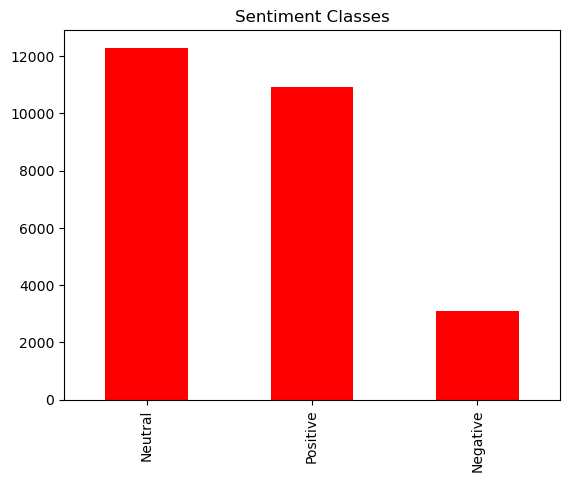

In [66]:
df.sentiment_analysis.value_counts().plot(kind='bar', color='red')
plt.title('Sentiment Classes')
plt.show()

Text(0, 0.5, 'Subjectivity')

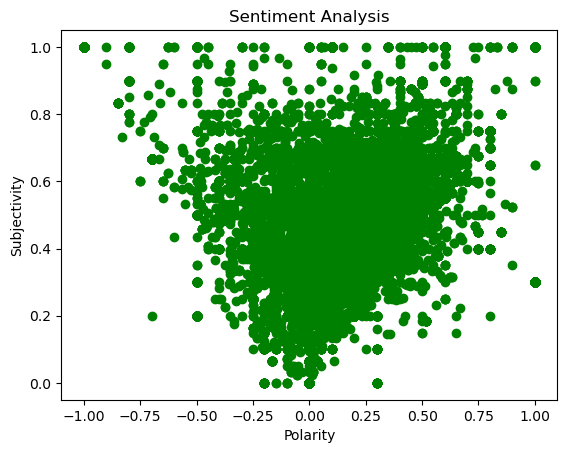

In [67]:
plt.scatter(df.polarity, df.subjectivity, color='green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [68]:
Positive_tweets = df[df['sentiment_analysis'] == 'Positive']
Negative_tweets = df[df['sentiment_analysis'] == 'Negative']

In [69]:
print('Positive tweets')
for i, row in Positive_tweets[:5].iterrows():
    print(' -' + row['text'])

print('Negative tweets')
for i, row in Negative_tweets[:5].iterrows():
     print(' -' + row['text'])

Positive tweets
 -meh not the greatest experi on a chromebook seem to be custom for phone onli open in a littl screen that you cant expand or resiz for reason that are a complet mysteri to me judg from the fact that everi other app i know of is resiz thi seem like it wa a consciou choic by the develop whi youd do someth like thi is beyond understand and suggest a control freak approach not a great way to make a first impress
 -pretti good for a first launch it easi to use and selfexplanatori and id say the algorithm is good as well it ha great potenti but a few thing need improv the abil to use hashtag would make it easier to find topic and peopl youd be interest in an option for a followingonli feed would be a major improv especi chronolog order the abil to choos imag from album rather than recent photo the abil to save photo to phone
 -for a brand new app it veri well optim howev it just miss quit a few featur that app like twitter have there is no way to have your timelin show threa

In [70]:
df = df[['text','sentiment_analysis']]
df.head()

text sentiment_analysis
0  meh not the greatest experi on a chromebook se...           Positive
1  pretti good for a first launch it easi to use ...           Positive
2  for a brand new app it veri well optim howev i...           Positive
3  great app with a lot of potenti howev there is...           Positive
4  the app is good but it need a lot of function ...           Positive

In [71]:
df.tail()

text sentiment_analysis
32905  thi kill my dog mark zuckerburg strangl him my...            Neutral
32906                add search and hashtag like twitter            Neutral
32907                                        bad twister           Negative
32908                          yet anoth trash from meta            Neutral
32909     noth special thi app is just a copi of twitter           Positive

In [72]:
df = df[df['sentiment_analysis']!= 'Neutral']
df.head()

text sentiment_analysis
0  meh not the greatest experi on a chromebook se...           Positive
1  pretti good for a first launch it easi to use ...           Positive
2  for a brand new app it veri well optim howev i...           Positive
3  great app with a lot of potenti howev there is...           Positive
4  the app is good but it need a lot of function ...           Positive

In [73]:
df.tail()

text sentiment_analysis
32900                    meta the greatest thread mark z           Positive
32901                                      love it w app           Positive
32904  censor conserv and silenc us to turn other dem...           Negative
32907                                        bad twister           Negative
32909     noth special thi app is just a copi of twitter           Positive

In [74]:
df.shape

(13991, 2)

In [75]:
df.columns

Index(['text', 'sentiment_analysis'], dtype='object')

In [76]:
df.isnull().sum()

text                  0
sentiment_analysis    0
dtype: int64

In [77]:
df.duplicated().sum()

288

In [78]:
df.drop_duplicates(keep = "first", inplace=True)
df.duplicated().sum()

0

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13703 entries, 0 to 32909
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                13703 non-null  object
 1   sentiment_analysis  13703 non-null  object
dtypes: object(2)
memory usage: 321.2+ KB


#### Convert sentiment_analysis column to Numeric Data type

In [80]:
df["sentiment_analysis"] = le.fit_transform(df["sentiment_analysis"])
df.head()

text  sentiment_analysis
0  meh not the greatest experi on a chromebook se...                   1
1  pretti good for a first launch it easi to use ...                   1
2  for a brand new app it veri well optim howev i...                   1
3  great app with a lot of potenti howev there is...                   1
4  the app is good but it need a lot of function ...                   1

In [81]:
df.tail()

text  sentiment_analysis
32900                    meta the greatest thread mark z                   1
32901                                      love it w app                   1
32904  censor conserv and silenc us to turn other dem...                   0
32907                                        bad twister                   0
32909     noth special thi app is just a copi of twitter                   1

### WordCloud for Text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


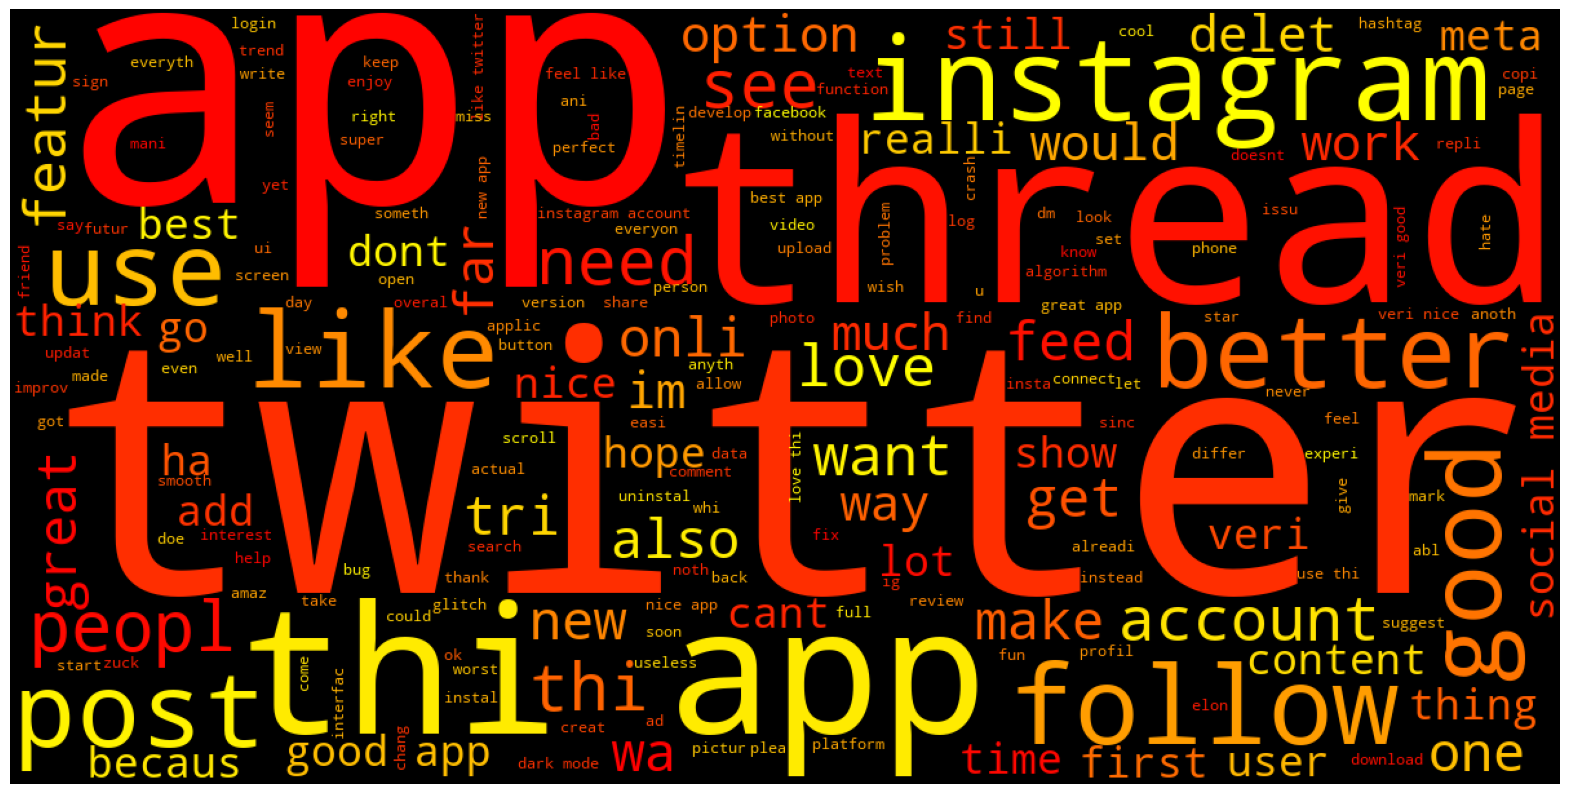

In [82]:
from wordcloud import WordCloud as WC
# loading stop words 
nltk.download('stopwords')
st_wd = set(nltk.corpus.stopwords.words('english'))
 
# Combining all texts
every_word = ' '.join([txts for txts in df['text']])
 
# word cloud function
def Word_cloud(data, mask=None):
    Cloud = WC(scale=3,
                      random_state=21,
                      colormap='autumn',
                      mask=mask,
                      stopwords=st_wd,
                      collocations=True,).generate(data)
    plt.figure(figsize=(20,12))
    plt.imshow(Cloud)
    plt.axis('off')
    plt.show()
    
# plotting the word cloud
Word_cloud(every_word)

## Building Model

In [83]:
X = df["text"]
y = df["sentiment_analysis"]

In [84]:
X.shape

(13703,)

In [85]:
y.shape

(13703,)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

### Naive Bayes(MultinomialNB)

In [88]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [89]:
predictions = nb.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 578  331]
 [ 157 3045]]


              precision    recall  f1-score   support

           0       0.79      0.64      0.70       909
           1       0.90      0.95      0.93      3202

    accuracy                           0.88      4111
   macro avg       0.84      0.79      0.81      4111
weighted avg       0.88      0.88      0.88      4111



### Using Pipeline Method

In [91]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [92]:
X = df['text']
y = df['sentiment_analysis']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [93]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [94]:
predictions1 = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[ 131  778]
 [   4 3198]]
              precision    recall  f1-score   support

           0       0.97      0.14      0.25       909
           1       0.80      1.00      0.89      3202

    accuracy                           0.81      4111
   macro avg       0.89      0.57      0.57      4111
weighted avg       0.84      0.81      0.75      4111



# Thank you!